In [1]:
%matplotlib inline
import warnings; warnings.simplefilter('ignore')  # hide warnings 

import sys
sys.path.append("../")

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import particles.mcmc as mcmc
import particles.state_space_models as ssm
import particles.distributions as dists
from particles.core import SMC
from particles import smc_samplers as ssp
import seaborn
from tqdm import tqdm
import pickle
import os

path = r'C:\Users\dobau\Desktop\3A ENSAE\S1\Hidden Markov Chain and MCMC\Project\res'
from Utils import *

We now use the three steps Adaptative method proposed by Knape & De Valpine (2012). We focus our experiments on the three models detailed in the paper: Random Walk (M3), Exponential growth (M2) and Logistic Diffusion with Euler Discretization (M1).

In [2]:
n_particles = 4000
n_iter = 5000
m1, m2, update_interv = 2000, 4000, 200

## Random Walk model

In [7]:
prior_RW = {'tau': dists.Uniform(a=0.,b=1.),'sigma': dists.Uniform(a=0.,b=10.)}
p_RW = dists.StructDist(prior_RW)
load_model = True

if load_model:
    pmmh_RW = pickle.load(open( os.path.join(path,"RW_model_Adapt.pkl"), "rb" ))
else:
    new_pmmh_RW= AdaptivePMMH(ssm_cls=RandomWalk2D, prior=p_RW, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                          m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.)
    new_pmmh_RW.run()
    pickle.dump(new_pmmh_RW, open( os.path.join(path,"RW_model_Adapt.pkl"), "wb" ) )

mean square jump distance: 48.148007058125636
posterior loglikelihood: [-537.69458638 -537.69458638 -539.46421581 -537.4490891  -539.05154645]
Acceptance rate: 0.2988597719543909
Last terms of theta chain: [(0.43071941, 0.04277269) (0.40072996, 0.07544771)
 (0.69481959, 0.07437992)]


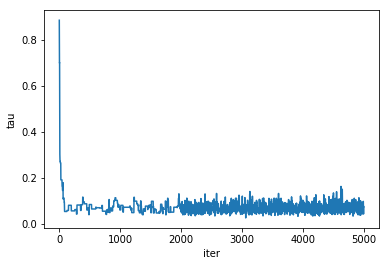

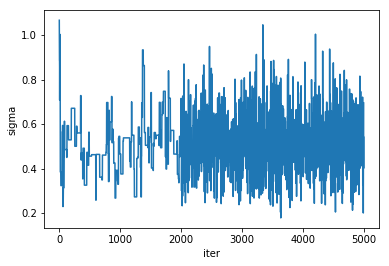

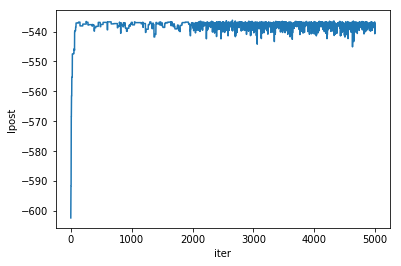

In [8]:
print_metrics(new_pmmh_RW)
plot_theta(prior_RW,new_pmmh_RW)

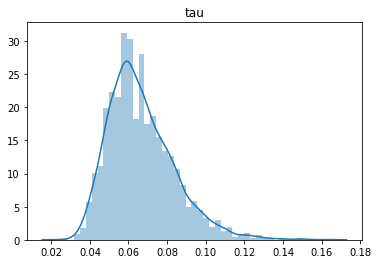

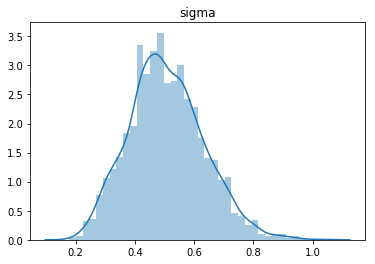

In [14]:
distplot(prior_RW, new_pmmh_RW, 2000)

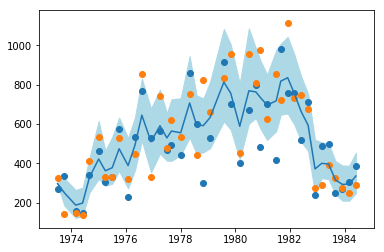

In [10]:
simulRW_new = get_trajectories(N=100, start=2000, model='RW', pmmh=new_pmmh_RW, n_particles=10000)
plot_posterior_trajectories(simulRW_new)

## Exponential Growth (M2)

In [15]:
prior_EG = {'tau': dists.Uniform(a=0.,b=1.),
             'sigma': dists.Uniform(a=0.,b=10.), 'r':dists.Uniform(a=-10., b=10.)}

load_model = False

if load_model:
    pmmh_Ldrift = pickle.load(open( os.path.join(path,"EG_model_Adapt.pkl"), "rb" ))
else:
    p_EG = dists.StructDist(prior_EG)
    new_pmmh_EG= AdaptivePMMH(ssm_cls=LDPDrift, prior=p_EG, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                          m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=5., k1=5.)
    new_pmmh_EG.run()
    pickle.dump(new_pmmh_EG, open( os.path.join(path,"EG_model_Adapt.pkl"), "wb" ) )

100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [07:07<00:00, 11.69it/s]


mean square jump distance: 41.40571838365183
posterior loglikelihood: [-541.97675096 -541.97675096 -541.97675096 -541.70936685 -541.70936685]
Acceptance rate: 0.0652130426085217
Last terms of theta chain: [(-0.15903735, 0.56002645, 0.08422792)
 (-0.16132021, 0.66796391, 0.06615352)
 (-0.16132021, 0.66796391, 0.06615352)]


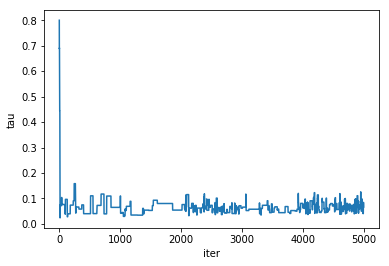

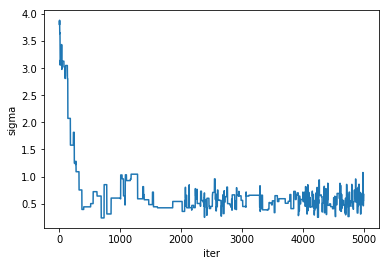

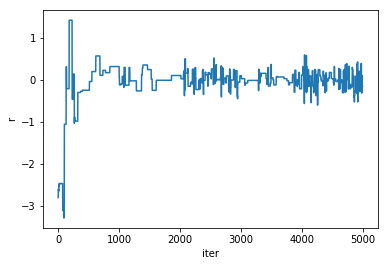

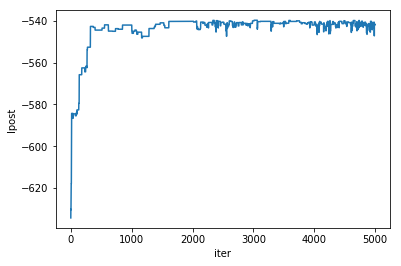

In [16]:
print_metrics(new_pmmh_EG)
plot_theta(prior_EG,new_pmmh_EG)

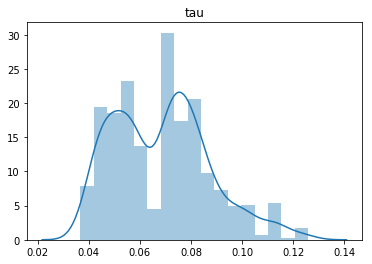

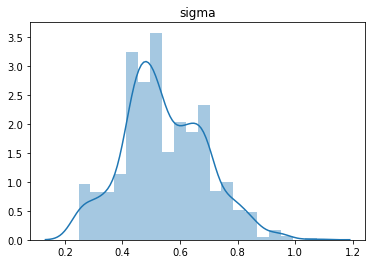

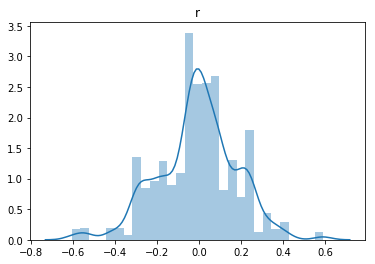

In [19]:
distplot(prior_EG, new_pmmh_EG, 4000)

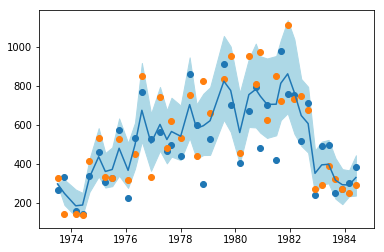

In [20]:
simulEG_new = get_trajectories(N=100, start=4000, model='LDrift', pmmh=new_pmmh_EG, n_particles=10000)
plot_posterior_trajectories(simulEG_new)

## Logistic Diffusion Process with Euler discretization

In [30]:
prior_LDP = {'tau': dists.Uniform(a=0.,b=0.2), 'b': dists.Uniform(a=0., b=1e-2),
             'sigma': dists.Uniform(a=0.,b=2.), 'r':dists.Uniform(a=-2., b=6.)}

load_model = False

if load_model:
    new_pmmh_LDP = pickle.load(open( os.path.join(path,"LDP_model_Adapt.pkl"), "rb" ))
else:
    p_LDP = dists.StructDist(prior_LDP)
    new_pmmh_LDP= AdaptivePMMH(ssm_cls=LDEuler, prior=p_LDP, data=y, Nx=n_particles, niter=n_iter, adaptive=True,
                          m1=m1, m2=m2, update_interv=update_interv, w01=0.4, w02=0.5, w1=0.8, k0=25., k1=5.)
    new_pmmh_LDP.run()
    pickle.dump(new_pmmh_LDP, open( os.path.join(path,"LDP_model_Adapt.pkl"), "wb" ) )


 41%|███████████████████████████████▋                                              | 2032/5000 [00:39<06:55,  7.14it/s]


 42%|████████████████████████████████▊                                             | 2107/5000 [00:48<06:40,  7.22it/s]


 44%|██████████████████████████████████                                            | 2187/5000 [00:58<06:38,  7.05it/s]


 45%|███████████████████████████████████▎                                          | 2260/5000 [01:08<06:46,  6.74it/s]


 47%|████████████████████████████████████▍                                         | 2338/5000 [01:18<06:25,  6.91it/s]


 48%|█████████████████████████████████████▋                                        | 2413/5000 [01:27<06:24,  6.74it/s]


 50%|██████████████████████████████████████▊                                       | 2484/5000 [01:37<05:31,  7.60it/s]


 51%|███████████████████████████████████████▊                                      | 2556/5000 [01:47<05:37,  7.24it/s]


 53%|█████████████████████████████████████████                                     | 2631/5000 [01:56<05:42,  6.92it/s]


 54%|██████████████████████████████████████████▎                                   | 2716/5000 [02:06<04:37,  8.22it/s]


 56%|███████████████████████████████████████████▌                                  | 2796/5000 [02:16<04:03,  9.07it/s]


 57%|████████████████████████████████████████████▋                                 | 2867/5000 [02:26<05:29,  6.47it/s]


 59%|█████████████████████████████████████████████▉                                | 2945/5000 [02:36<04:47,  7.15it/s]


 61%|███████████████████████████████████████████████▎                              | 3033/5000 [02:47<04:42,  6.96it/s]


 62%|████████████████████████████████████████████████▍                             | 3103/5000 [02:59<09:19,  3.39it/s]


 64%|█████████████████████████████████████████████████▌                            | 3180/5000 [03:10<03:52,  7.83it/s]


 65%|██████████████████████████████████████████████████▊                           | 3261/5000 [03:20<03:30,  8.25it/s]


 67%|████████████████████████████████████████████████████                          | 3334/5000 [03:30<04:13,  6.56it/s]


 68%|█████████████████████████████████████████████████████▏                        | 3406/5000 [03:41<04:02,  6.59it/s]


 70%|██████████████████████████████████████████████████████▋                       | 3502/5000 [03:53<03:30,  7.12it/s]


 72%|███████████████████████████████████████████████████████▊                      | 3578/5000 [04:03<03:12,  7.37it/s]


 73%|█████████████████████████████████████████████████████████                     | 3659/5000 [04:13<02:30,  8.89it/s]


 75%|██████████████████████████████████████████████████████████▏                   | 3730/5000 [04:24<03:32,  5.98it/s]


 76%|███████████████████████████████████████████████████████████▎                  | 3804/5000 [04:38<04:14,  4.71it/s]


 77%|████████████████████████████████████████████████████████████▍                 | 3874/5000 [04:52<03:45,  4.99it/s]


 79%|█████████████████████████████████████████████████████████████▋                | 3952/5000 [05:04<02:05,  8.33it/s]


 81%|██████████████████████████████████████████████████████████████▊               | 4027/5000 [05:41<01:48,  9.00it/s]


 82%|████████████████████████████████████████████████████████████████              | 4106/5000 [05:51<01:46,  8.40it/s]


 84%|█████████████████████████████████████████████████████████████████▏            | 4180/5000 [06:00<01:44,  7.86it/s]


 85%|██████████████████████████████████████████████████████████████████▍           | 4259/5000 [06:09<01:27,  8.50it/s]


 87%|███████████████████████████████████████████████████████████████████▊          | 4349/5000 [06:19<01:07,  9.63it/s]


 88%|█████████████████████████████████████████████████████████████████████         | 4424/5000 [06:28<01:12,  7.97it/s]


 90%|██████████████████████████████████████████████████████████████████████▎       | 4505/5000 [06:38<01:05,  7.61it/s]


 92%|███████████████████████████████████████████████████████████████████████▍      | 4576/5000 [06:46<00:54,  7.72it/s]


 93%|████████████████████████████████████████████████████████████████████████▉     | 4673/5000 [06:56<00:34,  9.58it/s]


 95%|██████████████████████████████████████████████████████████████████████████    | 4749/5000 [07:05<00:31,  7.99it/s]


 97%|███████████████████████████████████████████████████████████████████████████▌  | 4845/5000 [07:16<00:18,  8.56it/s]


 98%|████████████████████████████████████████████████████████████████████████████▊ | 4920/5000 [07:25<00:09,  8.32it/s]


100%|█████████████████████████████████████████████████████████████████████████████▉| 4999/5000 [07:35<00:00,  7.98it/s]


100%|██████████████████████████████████████████████████████████████████████████████| 5000/5000 [07:35<00:00,  7.73it/s]


mean square jump distance: 0.09935974769684343
posterior loglikelihood: [-545.13132035 -545.13132035 -545.13132035 -545.13132035 -545.13132035]
Acceptance rate: 0.008401680336067214
Last terms of theta chain: [(0.00100965, 0.68198738, 0.16748859, 0.18867634)
 (0.00100965, 0.68198738, 0.16748859, 0.18867634)
 (0.00100965, 0.68198738, 0.16748859, 0.18867634)]


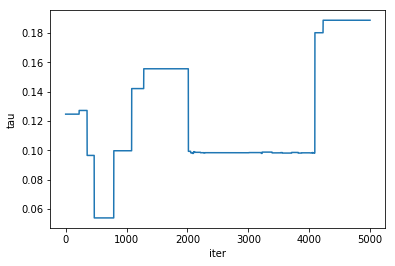

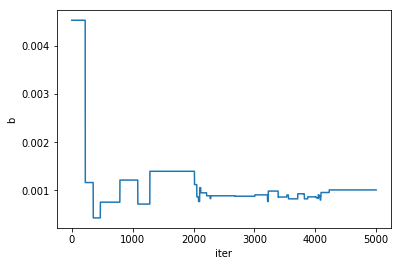

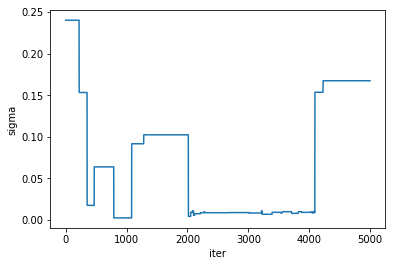

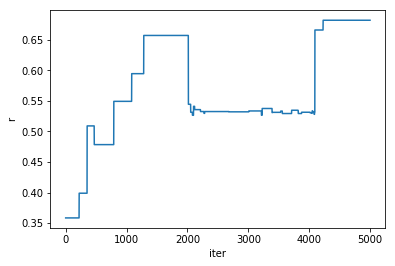

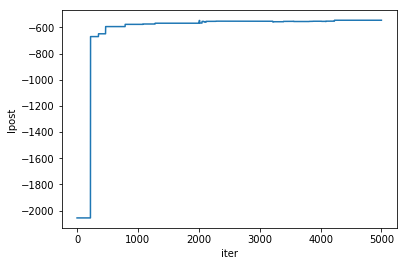

In [31]:
print_metrics(new_pmmh_LDP)
plot_theta(prior_LDP,new_pmmh_LDP)

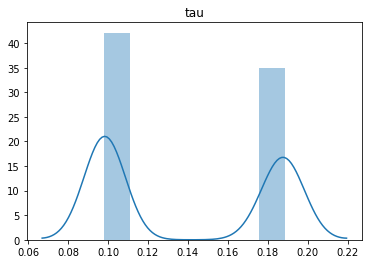

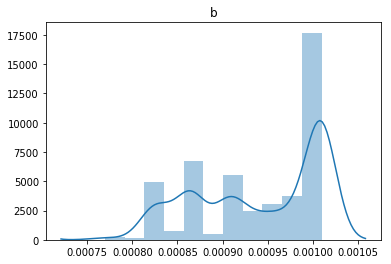

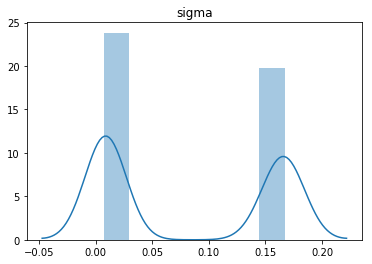

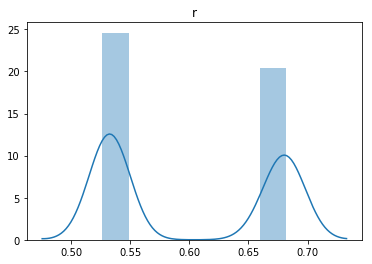

In [32]:
distplot(prior_LDP, new_pmmh_LDP, 3000)

In [33]:
simulLDP_new = get_trajectories(N=100, start=3000, model='LDP', pmmh=new_pmmh_LDP, n_particles=10000)
plot_posterior_trajectories(simulLDP_new)

ValueError: a must be non-empty